In [1]:

import numpy as np
import scanpy as sc
import scipy
from scipy.sparse import csr_matrix
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
#from composition_stats import clr
import anndata as ad
import scirpy as ir


In [2]:
!pip install git+https://github.com/gtca/muon.git

  Cloning https://github.com/gtca/muon.git to c:\users\okatk\appdata\local\temp\pip-req-build-hynh3gxo
  Resolved https://github.com/gtca/muon.git to commit 6192f7698d8f3eca39412cd63699ef0b6a927d64
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gtca/muon.git 'C:\Users\okatk\AppData\Local\Temp\pip-req-build-hynh3gxo'


In [3]:
import muon as mu

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\okatk\AppData\Local\Programs\Python\Python3

In [4]:
help(ir)

Help on package scirpy:

NAME
    scirpy - Python library for single-cell adaptive immune receptor repertoire (AIRR) analysis

PACKAGE CONTENTS
    _compat
    _metadata
    datasets (package)
    get (package)
    io (package)
    ir_dist (package)
    pl (package)
    pp (package)
    tests (package)
    tl (package)
    util (package)

VERSION
    0.13.0rc1

FILE
    c:\users\okatk\appdata\local\programs\python\python311\lib\site-packages\scirpy\__init__.py




In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is CAD3-AF8B

 Directory of C:\Users\okatk\Drexel

08/06/2023  01:36 PM    <DIR>          .
08/05/2023  09:50 PM    <DIR>          ..
08/05/2023  09:36 PM    <DIR>          .ipynb_checkpoints
08/05/2023  09:39 PM         1,995,594 TCR_tasks (6).ipynb
08/06/2023  01:36 PM            84,442 TCR_tasks(08052023).ipynb
08/04/2023  09:27 PM            30,108 TCR_tasks_4.ipynb
               3 File(s)      2,110,144 bytes
               3 Dir(s)  920,240,844,800 bytes free


In [6]:
# load in everything, perform batch correction with harmony and the normal qc from scirpy

file_list = [
     ir.io.read_10x_vdj(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\filtered_contig_annotations_lib_1.csv"), 
     ir.io.read_10x_vdj(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\filtered_contig_annotations_lib_2.csv"), 
     ir.io.read_10x_vdj(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\filtered_contig_annotations_lib_3.csv")
]
# 14206, 15031, 14752

#labels = 14206*["lib1"] +  15031* ["lib2"]+ 14752*["lib3"]
new_l = []
for index in range(len(file_list)):
    adata = file_list[index]
    adata.obs["batch"] = "lib_" + str(index)
    new_l.append(adata)
    


C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\aligned_mapping.py:54: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(


In [7]:
tcr_concat = ad.concat(new_l, merge="same")
# add batch labels
tcr_concat.obs_names_make_unique()
# now TCR qc
ir.pp.index_chains(tcr_concat) # only needs airr
ir.tl.chain_qc(tcr_concat) # only needs airr

print(tcr_concat.obs.receptor_subtype)
#raise Error
# further tcr qc
mu.pp.filter_obs(tcr_concat, "chain_pairing", lambda x: x != "multichain")
mu.pp.filter_obs(tcr_concat, "chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))
# it would appear that batch correction is ill-posed here.
# basic dim reduction for each modality
# sc.pp.pca(tcr_concat)
# # batch correction
# sce.pp.harmony_integrate(tcr_concat, 'batch') 
# then save it in same manner as other modalities
tcr_concat.write_h5ad(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\correct_tcr.h5ad")

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/43989 [00:00<?, ?it/s]

cell_id
AAACCTGAGACTAAGT-1      TRA+TRB
AAACCTGAGAGGGATA-1      TRA+TRB
AAACCTGAGCAATCTC-1      TRA+TRB
AAACCTGAGCCCAGCT-1      TRA+TRB
AAACCTGAGCTCCTCT-1      TRA+TRB
                         ...   
TTTGTCAGTGAAAGAG-1      TRA+TRB
TTTGTCAGTGAAGGCT-1      TRA+TRB
TTTGTCATCACGATGT-1      TRA+TRB
TTTGTCATCCACTGGG-1      TRA+TRB
TTTGTCATCTTGGGTA-1-1    TRA+TRB
Name: receptor_subtype, Length: 43989, dtype: object


In [8]:
print(tcr_concat.obs.receptor_subtype.unique())

['TRA+TRB']
Categories (1, object): ['TRA+TRB']


In [9]:
help(ir)


Help on package scirpy:

NAME
    scirpy - Python library for single-cell adaptive immune receptor repertoire (AIRR) analysis

PACKAGE CONTENTS
    _compat
    _metadata
    datasets (package)
    get (package)
    io (package)
    ir_dist (package)
    pl (package)
    pp (package)
    tests (package)
    tl (package)
    util (package)

VERSION
    0.13.0rc1

FILE
    c:\users\okatk\appdata\local\programs\python\python311\lib\site-packages\scirpy\__init__.py




In [10]:
# load in files 
file_list = [
    sc.read_h5ad(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\correct_rna.h5ad"),
    sc.read_h5ad(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\correct_tcr.h5ad"),
    sc.read_h5ad(r"C:\Users\okatk\OneDrive - Tredyffrin Easttown School District\Drexel Research\correct_protein.h5ad")
]
for adata in file_list:
    try:
        adata.uns['log1p']["base"] = None 
    except:
        pass
# fill out the mudata object
mdata = mu.MuData({"gex": file_list[0],  
                   "airr": file_list[1],
                   "prot": file_list[2]})

mdata["gex"], mdata["airr"], mdata["prot"]

(AnnData object with n_obs × n_vars = 47024 × 28608
     obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
     var: 'gene_ids', 'featu

In [11]:
mdata["airr"].obs.receptor_subtype

cell_id
AAACCTGAGACTAAGT-1      TRA+TRB
AAACCTGAGCAATCTC-1      TRA+TRB
AAACCTGAGCCCAGCT-1      TRA+TRB
AAACCTGAGCTCCTCT-1      TRA+TRB
AAACCTGAGGACGAAA-1      TRA+TRB
                         ...   
TTTGTCAGTGAAAGAG-1      TRA+TRB
TTTGTCAGTGAAGGCT-1      TRA+TRB
TTTGTCATCACGATGT-1      TRA+TRB
TTTGTCATCCACTGGG-1      TRA+TRB
TTTGTCATCTTGGGTA-1-1    TRA+TRB
Name: receptor_subtype, Length: 40077, dtype: category
Categories (1, object): ['TRA+TRB']

In [12]:
airr_cell_ids = set(mdata["airr"].obs.index)
gex_cell_ids = set(mdata["gex"].obs.index)
prot_cell_ids = set(mdata["prot"].obs.index)

In [13]:
len(airr_cell_ids)

40077

In [14]:
len(gex_cell_ids)

47024

In [15]:
prot_cell_ids

{'CGGACTGCATTCCTCG-1',
 'CGGCTAGCAATTCCTT-1',
 'GTAGGCCAGGAGTCTG-1',
 'GGACAAGCAGCCTTTC-1',
 'GGACAGATCTCTGCTG-1',
 'ACGGGTCTCTGTCTAT-1',
 'GTCTCGTCATTCCTCG-1',
 'TAGCCGGTCAAACGGG-1',
 'CCGGTAGGTTCCAACA-1',
 'GACACGCTCGCGCCAA-1',
 'AAATGCCGTCAGTGGA-1',
 'CGGCTAGAGAGTACCG-1',
 'CTTCTCTTCACTCTTA-1',
 'CTTAACTTCCTCCTAG-1',
 'GCGCCAAGTATATGGA-1',
 'CGACCTTAGCAACGGT-1',
 'CGTGTCTTCACATACG-1',
 'ACTGAACCATATGCTG-1',
 'CCTACACCAGCGTTCG-1',
 'GGAGCAATCCACTCCA-1',
 'CGTAGGCTCTCGTTTA-1',
 'ACCCACTAGTGCGTGA-1',
 'AGCAGCCGTTACGGAG-1',
 'AGCTCTCGTATATCCG-1',
 'GATTCAGAGTATTGGA-1',
 'AAGGCAGTCAGCTCGG-1',
 'AAGGTTCGTCCAAGTT-1',
 'CACACCTGTCTGCGGT-1',
 'ATCGAGTTCAACACGT-1',
 'TGGACGCAGGCAAAGA-1',
 'AGGCCACCACGGACAA-1',
 'GTGGGTCTCACAAACC-1',
 'CACCACTTCTCAAACG-1',
 'TTTGTCATCTTGGGTA-1-1',
 'ACTTGTTGTAGAAAGG-1',
 'GGACAGAAGTGGTAGC-1',
 'TCTCTAATCCTAGAAC-1',
 'CTCAGAAGTCTAGTGT-1',
 'CGACCTTTCTGCTGTC-1',
 'ACGGGCTGTGTTGAGG-1',
 'GCACTCTAGGCTCATT-1',
 'TCAGATGGTTAAGATG-1',
 'GTGCAGCTCATCTGCC-1',
 'TGGTTCC

In [16]:
len(airr_cell_ids), len(gex_cell_ids), len(prot_cell_ids)

(40077, 47024, 47024)

In [17]:
# check if there are cell barcodes that exist in airr and not in gex
#len(airr_cell_ids - gex_cell_ids), len(prot_cell_ids - gex_cell_ids), len(prot_cell_ids - airr_cell_ids), len(airr_cell_ids - prot_cell_ids)
# check if there are cell barcodes that exist in prot and not in gex
len(gex_cell_ids - airr_cell_ids)
# check if there are cell barcodes that exist in prot and not in airr

21596

  0%|          | 0/13524 [00:00<?, ?it/s]

Index(['gex:TotalSeq-C0251 anti-human Hashtag 1 Antibody',
       'gex:TotalSeq-C0252 anti-human Hashtag 2 Antibody',
       'gex:TotalSeq-C0253 anti-human Hashtag 3 Antibody',
       'gex:TotalSeq-C0254 anti-human Hashtag 4 Antibody',
       'gex:TotalSeq-C0255 anti-human Hashtag 5 Antibody',
       'gex:TotalSeq-C0256 anti-human Hashtag 6 Antibody',
       'gex:TotalSeq-C0257 anti-human Hashtag 7 Antibody',
       'gex:TotalSeq-C0258 anti-human Hashtag 8 Antibody',
       'gex:TotalSeq-C0259 anti-human Hashtag 9 Antibody',
       'gex:TotalSeq-C0260 anti-human Hashtag 10 Antibody',
       'gex:TotalSeq-C0262 anti-human Hashtag 12 Antibody',
       'gex:TotalSeq-C0263 anti-human Hashtag 13 Antibody',
       'gex:most_likely_hypothesis', 'gex:cluster_feature',
       'gex:negative_hypothesis_probability',
       'gex:singlet_hypothesis_probability',
       'gex:doublet_hypothesis_probability', 'gex:Classification', 'gex:Thaw',
       'gex:batch', 'gex:n_genes_by_counts', 'gex:total_cou

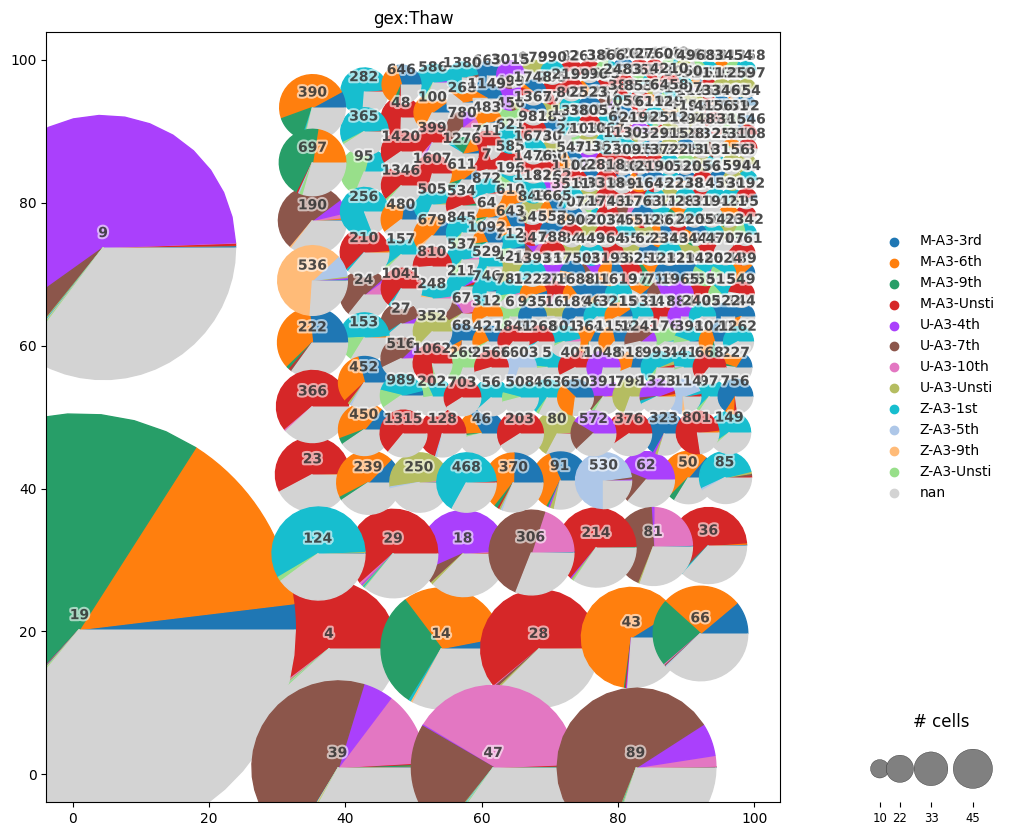

In [18]:
# define clonotypes
# using default parameters, `ir_dist` will compute nucleotide sequence identity

ir.pp.ir_dist(mdata)
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")
ir.tl.clonotype_network(mdata, min_cells=10) #50, 100 is good
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Thaw') #, base_size=20, label_fontsize=9, panel_size=(7, 7)

print(mdata.obs.columns)

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModification

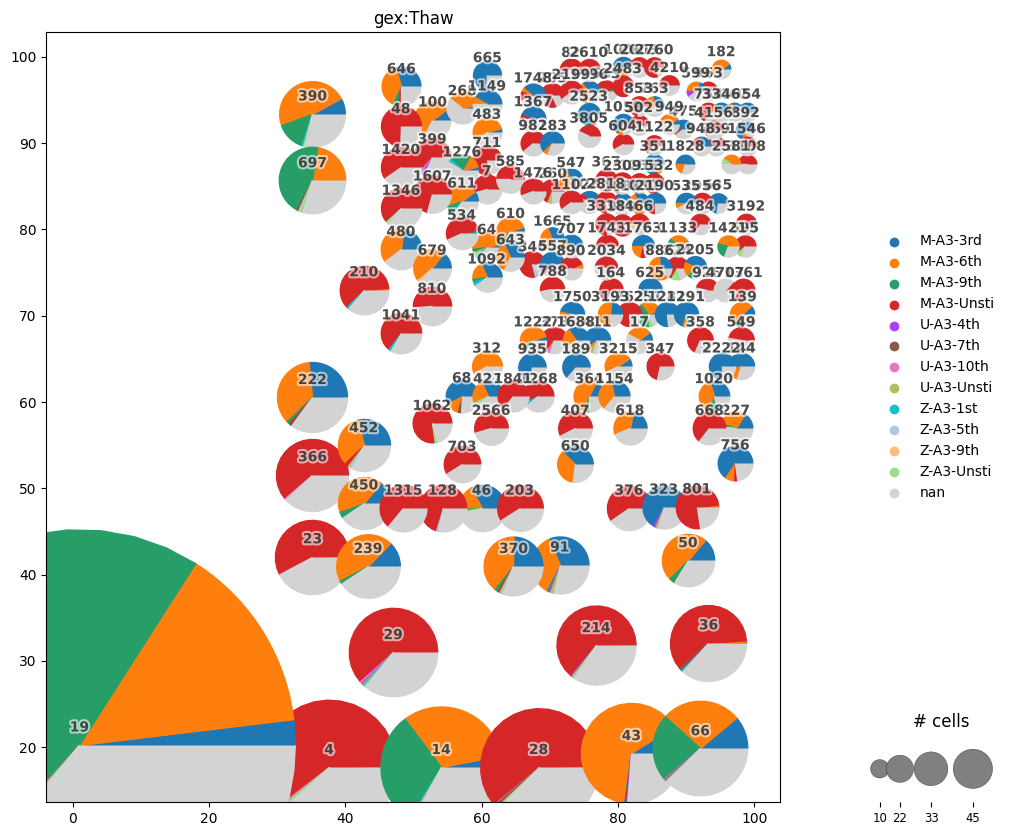

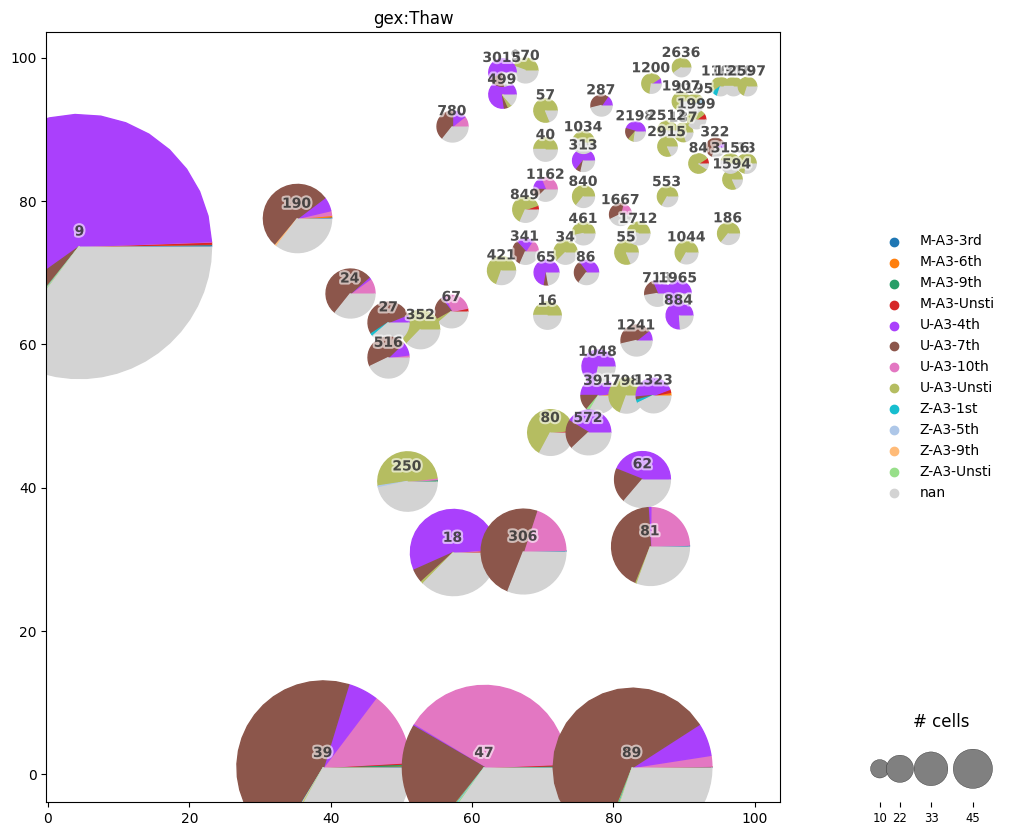

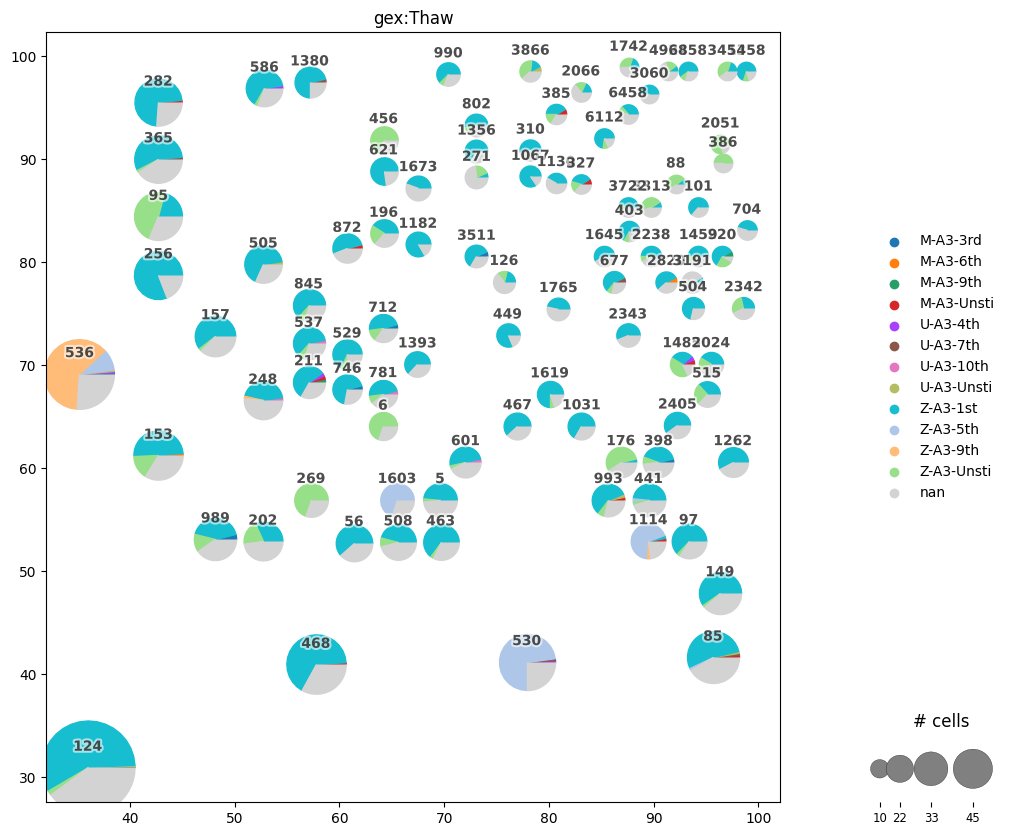

In [19]:
# Calculate the predominant donor for each clonotype
mdata.obs['donor'] = mdata["gex"].obs['Thaw'].apply(lambda x: x[0])

def get_predominant_donor(x):
    try:
        return x.value_counts().index[0]
    except IndexError:
        return None

predominant_donor = mdata.obs.groupby('airr:clone_id')['donor'].agg(get_predominant_donor)

# Map the predominant donor to each cell
mdata.obs['predominant_donor'] = mdata.obs['airr:clone_id'].map(predominant_donor)

# Get the unique donors
donors = mdata.obs['predominant_donor'].unique()

# Generate separate plots for each donor
for donor in donors:
    if donor is not None:  # Skip None
        subset = mdata[mdata.obs['predominant_donor'] == donor]
        if subset.obs.shape[0] > 0:  # Check that the subset has cells
            ir.pl.clonotype_network(
                subset, 
                color='gex:Thaw'  # Use the correct color attribute if you want to color the network differently
            )
            


In [ ]:
print(mdata.obs.columns)

In [ ]:
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Sample') #, base_size=20, label_fontsize=9, panel_size=(7, 7)
#)

In [ ]:
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Time') #, base_size=20, label_fontsize=9, panel_size=(7, 7)
#)

In [ ]:
# re-compute the clonotype network based on amino-acid sequence similarity and 
# define clonotype clusters.
ir.pp.ir_dist(
    mdata,
    metric="alignment",
    sequence="aa", # tried 15, 25, 10, was garbage
    cutoff=10,# was 15, I would try 10 next -- definitely faster with the smaller number
)
ir.tl.define_clonotype_clusters(
    mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir= "primary_only" #"any"
)


In [ ]:
ir.tl.clonotype_network(mdata, min_cells=40, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Thaw", label_fontsize=9, panel_size=(7, 7), base_size=20
)
# again color by your labels, not theirs

In [ ]:
ir.tl.clonotype_network(mdata, min_cells=33, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Sample", label_fontsize=9, panel_size=(7, 7), base_size=20
)

In [ ]:
ir.tl.clonotype_network(mdata, min_cells=33, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Time", label_fontsize=9, panel_size=(7, 7), base_size=20
)

In [ ]:
mdata["airr"].obsm['airr']

In [ ]:
mdata["airr"].obsm['chain_indices']

In [ ]:
# task 1 
# this is a little more complicated due to the nature of the data itself (these are not even scalars!)

# wants sample by TCR airr heatmap as one graph, 
# with hierarchical clustering on the opposing axises and colored by differential expression
sc.tl.rank_genes_groups(mdata["gex"], groupby='Thaw', method='wilcoxon')#, key_added = "wilcoxon")
#sc.pl.rank_genes_groups(mdata["gex"], n_genes=10, groupby='cluster')
#sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="thaw", groupby="louvain_0.6") 
# you can use this to give you mean expression in groups
sc.pl.rank_genes_groups_heatmap(mdata["gex"], 
                                n_genes=10, groupby='Thaw', show_gene_labels=True,) # save="heatmap.png")

In [ ]:
# create some mask on gex data to only have tcr receptor expression

mdata["gex"].var.gene_ids


In [ ]:
mdata["gex"].obs.Thaw 

In [ ]:
len(mdata["gex"].obs[mdata["gex"].obs.Thaw == "Z-A3-1st"].index)

In [ ]:
mdata["prot"].var.gene_ids

In [ ]:
"ADT_C0090" in list(mdata["prot"].var.gene_ids)
#just do the second paper's qc and redo all the protein + gex stuff
# MouseIgG1, MouseIgG2a, MouseIgG2b, RatIgG2b, RatIgG1, RatIgG2a, and HamsterIgG
# C0090, C0091, C0092, C0095
# match these to ADT tags based on the file Xiao gave you

In [ ]:
sc.tl.umap(mdata["prot"])
sc.pl.umap(mdata["prot"], color='Thaw',) # save="UMAP.png")

In [ ]:
mdata["gex"]

In [ ]:
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Thaw',)

In [ ]:
mdata["gex"]

In [ ]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
ir.tl.clonal_expansion(mdata)
mu.pl.embedding(
    mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"]
)
# need to have the rna data umap computed
# again change the groupby to use your sample labels
ir.pl.clonal_expansion( # groupby="gex:cluster"
    mdata, target_col="clone_id" , clip_at=20, normalize=False, groupby="gex:Thaw"
)
ir.pl.clonal_expansion(mdata, target_col="clone_id",clip_at=20, groupby="gex:Thaw")

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


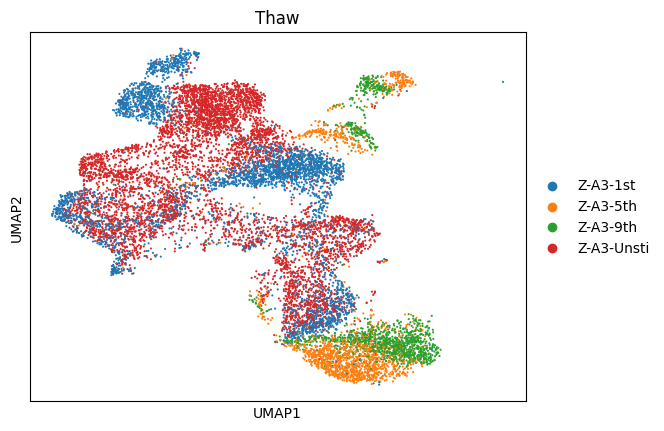

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


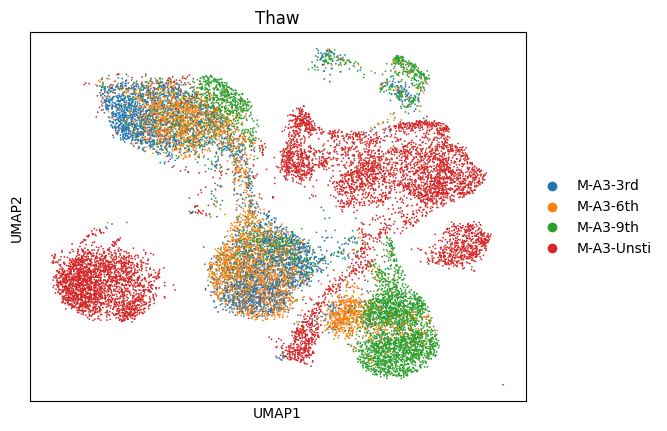

C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
C:\Users\okatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


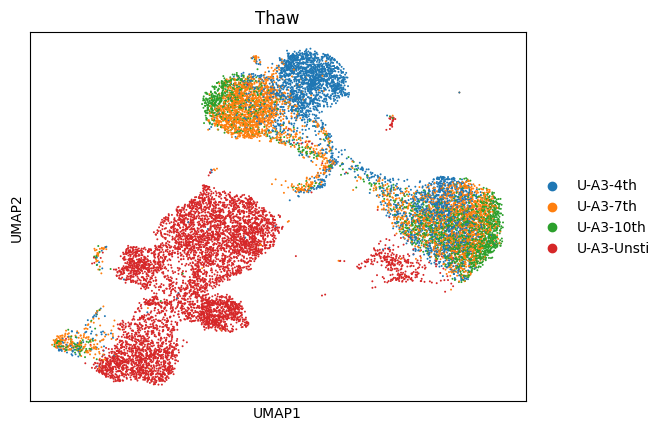

In [46]:
# task 2
# we must be missing a thaw label

# UMAP from protein data, where the clusters are colored by sample name
# create a new column called Sample that applies the predefined sample map
thaw_to_donor = {
    'Z-A3-Unsti' : "Z",
    'Z-A3-1st' : "Z", 
    'Z-A3-5th' : "Z",  
    'Z-A3-9th' : "Z",    
    "M-A3-Unsti" : "M",  
    "M-A3-3rd" : "M",
    "M-A3-6th": "M",
    "M-A3-9th" : "M",
    "U-A3-Unsti" : "U",
    "U-A3-4th" : "U",
    "U-A3-7th": "U",
    "U-A3-10th": "U"
}
# U-A3-Unsti is not getting picked up here

# [print(i)for i in mdata["prot"].obs['Thaw'].unique()]
# raise Error
mdata["prot"].obs["Sample"] = mdata["prot"].obs['Thaw'].map(thaw_to_donor)
mdata["gex"].obs["Sample"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)

Z, M, U = mdata["gex"][mdata["gex"].obs.Sample == "Z"], mdata["gex"][mdata["gex"].obs.Sample == "M"], mdata["gex"][mdata["gex"].obs.Sample == "U"]
sc.tl.umap(Z)
sc.pl.umap(Z, color='Thaw',) # save="UMAP.png")
sc.tl.umap(M)
sc.pl.umap(M, color='Thaw',) # save="UMAP.png")
sc.tl.umap(U)
sc.pl.umap(U, color='Thaw',) # save="UMAP.png")

In [ ]:
# keep all GEX, but restrict label set to each donor
thaw_to_donor = {
    'Z-A3-Unsti' : "Z-A3-Unsti",
    'Z-A3-1st' : "Z-A3-1st", 
    'Z-A3-5th' : "Z-A3-5th",  
    'Z-A3-9th' : "Z-A3-9th",    
    "M-A3-Unsti" : "NA",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "NA",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}

mdata["gex"].obs["Z_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Z_only', alpha=0.5, palette={'Z-A3-Unsti':'tab:cyan',
                                                      'Z-A3-1st':'tab:olive',
                                                      'Z-A3-5th':'tab:red',
                                                      "Z-A3-9th":"tab:purple",      
                                                      'NA':'whitesmoke'})

In [ ]:
thaw_to_donor = {
    'Z-A3-Unsti' : "NA",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "M-A3-Unsti",  
    "M-A3-3rd" : "M-A3-3rd",
    "M-A3-6th": "M-A3-6th",
    "M-A3-9th" : "M-A3-9th",
    "U-A3-Unsti" : "NA",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}
mdata["gex"].obs["M_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='M_only', alpha=0.5, palette={'M-A3-Unsti':'tab:cyan',
                                                      'M-A3-3rd':'tab:olive',
                                                      "M-A3-6th":'tab:red',   
                                                      'M-A3-9th':'tab:purple',
                                                      'NA':'whitesmoke'})

In [ ]:
thaw_to_donor = {
    'Z-A3-Unsti' : "NA",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "NA",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "U-A3-Unsti",
    "U-A3-4th" : "U-A3-4th",
    "U-A3-7th": "U-A3-7th",
    "U-A3-10th": "U-A3-10th"
}
mdata["gex"].obs["U_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='U_only', alpha=0.5, palette={'U-A3-Unsti':'tab:cyan',
                                                      'U-A3-4th':'tab:olive',
                                                      'U-A3-7th':'tab:red',
                                                      'U-A3-10th':'tab:purple',
                                                      'NA':'whitesmoke'})

In [ ]:
# keep all GEX, but restrict label set to each unstim
thaw_to_donor = {
    'Z-A3-Unsti' : "Z-A3-Unsti",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "M-A3-Unsti",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "U-A3-Unsti",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}

mdata["gex"].obs["unstim_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='unstim_only', alpha=0.5, palette={'M-A3-Unsti':'tab:cyan',
                                                      'Z-A3-Unsti':'tab:olive',
                                                      'U-A3-Unsti':'tab:red',
                                                      'NA':'whitesmoke'})

In [ ]:
# task 3
# 3 UMAPs (one for each donor), non-TCR-repertoire RNA, color by different time points
# create a new column called Sample that applies the predefined sample map
thaw_to_time = {
    
    'Z-A3-Unsti' : 0,
    'Z-A3-1st' : 1, 
    'Z-A3-5th' : 5,  
    'Z-A3-9th' : 9,    
    "M-A3-Unsti" : 0,  
    "M-A3-3rd" : 3,
    "M-A3-6th": 6,
    "M-A3-9th" : 9,
    "U-A3-Unsti" : 0,
    "U-A3-4th" : 4,
    "U-A3-7th": 7,
    "U-A3-10th": 10
}
mdata["gex"].obs["Time"] = mdata["gex"].obs['Thaw'].map(thaw_to_time)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Time' )#, save="UMAP.png")

In [ ]:
mdata.update()
mdata["gex"]

In [ ]:
mdata["airr"].obs.batch.index.intersection(mdata["airr"].obs.Thaw.index)

In [ ]:
# remove all barcodes 
#mdata["airr"].obs["Thaw"] =  #.obs.Thaw

# Create a DataFrame from the first column
first_df = pd.DataFrame(mdata["gex"].obs["Thaw"], dtype=object) #mdata["gex"].obs["Thaw"]

# Create a DataFrame from the second column
second_df = pd.DataFrame(mdata["airr"].obs.clonal_expansion ) # mdata["airr"].obs.clonal_expansion

# Perform a left join to align the indices and fill missing values with 'N/A'
aligned_df = first_df.join(second_df, how='right').fillna('N/A')
print(aligned_df)

# Update the 'second_column' in the AnnData object
mdata["airr"].obs["Thaw"] = aligned_df['Thaw']

# 
#mdata["airr"].obs.Thaw, mdata["airr"].obs.clonal_expansion
# Perform a left join to align the indices and fill missing values with 'N/A'
# mdata["airr"].obs["Thaw"] = mdata["gex"].obs["Thaw"].join(mdata["airr"].obs.clonal_expansion,
#                                                           how='left', rsuffix='_second').fillna('N/A')

# Update the 'second_column' in the AnnData object
#adata.obs['second_column'] = aligned_df['second_column_second']
mdata["airr"].obs["Thaw"]

In [ ]:
mdata["airr"].obs["Thaw"]

In [ ]:
mdata["airr"][mdata["airr"].obs["Thaw"] == thaw_name]

In [ ]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
for thaw_name in mdata["gex"].obs.Thaw.unique():
    # so now we want to apply the thaw labels to the airr and subset on that
    
    mdata_subset = mu.MuData({"gex": mdata["gex"][mdata["gex"].obs.Thaw == thaw_name],  
                   "airr": mdata["airr"][mdata["airr"].obs["Thaw"] == thaw_name],
                   "prot": mdata["prot"][mdata["prot"].obs.Thaw == thaw_name]})
    
    
    #print(mdata_subset["airr"])
    # using default parameters, `ir_dist` will compute nucleotide sequence identity
    # compute the  clonotypes on the subset but plot the rest                         
    ir.pp.ir_dist(mdata_subset)
    ir.tl.define_clonotypes(mdata_subset, receptor_arms="all", dual_ir="primary_only")
    #ir.tl.clonotype_network(mdata_subset, min_cells=30)
    ir.tl.clonal_expansion(mdata_subset)
    #print(mdata_subset["airr"].obs)#["clonal_expansion"])
    ce_name = thaw_name +"_clonal_expansion"
    ci_name = thaw_name + "_clone_id_size"
    mdata["airr"].obs[ce_name] = mdata_subset["airr"].obs["clonal_expansion"]
    mdata["airr"].obs[ci_name] = mdata_subset["airr"].obs["clone_id_size"]
#     temp_mdata = mu.MuData({"gex": file_list[0],  
#                    "airr": file_list[1],
#                    "prot": file_list[2]})
    mdata.update() # this shouldn't do anything
    print(thaw_name)
    mu.pl.embedding(
        mdata, basis="gex:umap", color=["airr:"+ce_name, "airr:"+ci_name]
    )
    # need to have the rna data umap computed
    # again change the groupby to use your sample labels
    #ir.pl.clonal_expansion( # groupby="gex:cluster"
    #    mdata_subset, target_col="clone_id" , clip_at=10, normalize=False, groupby="gex:Sample"
    #)
    #ir.pl.clonal_expansion(mdata_subset, target_col="clone_id", clip_at=10, groupby="gex:Sample")

In [ ]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
ir.tl.clonal_expansion(mdata)
mu.pl.embedding(
    mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"]
)
# need to have the rna data umap computed
# again change the groupby to use your sample labels
ir.pl.clonal_expansion( # groupby="gex:cluster"
    mdata, target_col="clone_id" , clip_at=10, normalize=False, groupby="gex:Time"
)
ir.pl.clonal_expansion(mdata, target_col="clone_id", clip_at=10, groupby="gex:Time")

In [ ]:
# now let's examine the tcr data more
mdata["airr"].obs.receptor_type

In [ ]:
mdata["airr"].obs.receptor_subtype

In [ ]:
mdata["airr"].obs.chain_pairing

In [ ]:
## 1. Extract Clonotype Data
clonotype_data = mdata["airr"].obs[['clone_id']]

# 2. Merge with GEX Data
# Drop the 'clone_id' column from mdata["gex"].obs before joining
mdata["gex"].obs = mdata["gex"].obs.drop('clone_id', axis=1, errors='ignore').join(clonotype_data)

# 3. Filter and Visualize

# Filter for "M-A3-3rd"
mdata_filtered_1 = mdata["gex"][mdata["gex"].obs['Thaw'] == "M-A3-3rd"]

# Filter for clonotype 19
mdata_filtered_1 = mdata_filtered_1[mdata_filtered_1.obs['clone_id'] == 19]

# Compute the neighborhood graph
sc.pp.neighbors(mdata_filtered_1)

# Compute UMAP
sc.tl.umap(mdata_filtered_1)

# Plot UMAP
sc.pl.umap(mdata_filtered_1, color=["clone_id", "Thaw"])
